## 控制社会人口学信息

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings

warnings.filterwarnings('ignore')

# 读取数据
data = pd.read_excel('./rawdata.xlsx', sheet_name='Sheet1')

# 删除 'Cluster' 列中等于 3 的行
data_cleaned = data[data['Cluster'] != 3]

data = data_cleaned
# 将列名中的空格替换为下划线,去掉逗号
data.columns = [col.replace(' ', '_').replace(',', '') for col in data.columns]

# 定义要检测的变量
variables = [
    ("Negative_symptom_at_baseline", "Negative_symptom_at_follow-up"),
    ("Positive_symptom_at_baseline", "Positive_symptom_at_follow-up"),
    ("Affective_symptom_at_baseline", "Affective_symptom_at_follow-up"), 
    ("Cognitive_impairment_at_baseline", "Cognitive_impairment_at_follow-up")
]

# 添加主题列
data['Subject'] = data.index
data = data.reset_index(drop=True)

# 分别计算 Cluster 0 和 Cluster 1 的均值、标准差及差值
for cluster_value in [0, 1]:
    print(f"\nCluster {cluster_value}:")

    cluster_data = data[data['Cluster'] == cluster_value]

    # 计算并打印均值 ± 标准差
    for baseline, follow_up in variables:
        baseline_mean = cluster_data[baseline].mean()
        baseline_std = cluster_data[baseline].std()
        follow_up_mean = cluster_data[follow_up].mean()
        follow_up_std = cluster_data[follow_up].std()
        
        # 计算差值的均值和标准差
        difference = cluster_data[follow_up] - cluster_data[baseline]
        diff_mean = difference.mean()
        diff_std = difference.std()
        
        # 打印基线和随访的均值和标准差
        print(f"{baseline}: {baseline_mean:.3f} ± {baseline_std:.3f}")
        print(f"{follow_up}: {follow_up_mean:.3f} ± {follow_up_std:.3f}")
        
        # 打印差值的均值和标准差
        print(f"Difference ({follow_up} - {baseline}): {diff_mean:.3f} ± {diff_std:.3f}")
        print()

# 自定义变量名称映射
variable_names = {
    "Negative_symptom_at_baseline -> Negative_symptom_at_follow-up": "PANSS\nNegative",
    "Positive_symptom_at_baseline -> Positive_symptom_at_follow-up": "PANSS\nPositive",
    "Affective_symptom_at_baseline -> Affective_symptom_at_follow-up": "Affective\nSymptoms",
    "Cognitive_impairment_at_baseline -> Cognitive_impairment_at_follow-up": "Cognitive\nImpairment"
}

# 存储结果用于差异比较
comparison_results = []

# 存储差值用于可视化
visualization_data = []

# 计算差值并进行差异比较，控制年龄、教育年限和性别
for baseline, follow_up in variables:
    # 计算差值
    data['Diff'] = data[follow_up] - data[baseline]

    # 构建混合效应模型
    model = mixedlm('Diff ~ Cluster + Age + Education_years + Gender', data, groups=data['Subject']).fit()

    # 提取 Cluster 的 p 值
    p_value = model.pvalues['Cluster']

    # 保存检验结果
    comparison_results.append({
        'Variable': f"{baseline} -> {follow_up}",
        'P-value': p_value,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

    # 保存差值用于可视化
    visualization_data.append(pd.DataFrame({
        'Cluster': ['Cluster 0'] * len(data[data['Cluster'] == 0]) + ['Cluster 1'] * len(data[data['Cluster'] == 1]),
        'Difference': data['Diff'],
        'Variable': variable_names[f"{baseline} -> {follow_up}"]
    }))

# 合并可视化数据
visualization_df = pd.concat(visualization_data, axis=0)

# 转为 DataFrame
results_df = pd.DataFrame(comparison_results)

# 打印检验结果
print("\nStatistical Test Results (Controlled for Age, Education Years, and Gender):")
print(tabulate(results_df, headers='keys', tablefmt='grid'))


Cluster 0:
Negative_symptom_at_baseline: 7.659 ± 2.502
Negative_symptom_at_follow-up: 4.632 ± 1.607
Difference (Negative_symptom_at_follow-up - Negative_symptom_at_baseline): -3.027 ± 2.673

Positive_symptom_at_baseline: 5.625 ± 1.810
Positive_symptom_at_follow-up: 2.207 ± 0.429
Difference (Positive_symptom_at_follow-up - Positive_symptom_at_baseline): -3.419 ± 1.894

Affective_symptom_at_baseline: 5.302 ± 0.863
Affective_symptom_at_follow-up: 3.638 ± 0.517
Difference (Affective_symptom_at_follow-up - Affective_symptom_at_baseline): -1.664 ± 1.006

Cognitive_impairment_at_baseline: 9.085 ± 1.987
Cognitive_impairment_at_follow-up: 5.505 ± 1.085
Difference (Cognitive_impairment_at_follow-up - Cognitive_impairment_at_baseline): -3.580 ± 2.236


Cluster 1:
Negative_symptom_at_baseline: 8.784 ± 2.386
Negative_symptom_at_follow-up: 7.219 ± 1.536
Difference (Negative_symptom_at_follow-up - Negative_symptom_at_baseline): -1.565 ± 2.605

Positive_symptom_at_baseline: 6.733 ± 1.596
Positive_sym

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings

warnings.filterwarnings('ignore')

# 读取数据
data = pd.read_excel('./rawdata.xlsx', sheet_name='Sheet1')

# 删除 'Group' 列中等于 3 的行
data = data[data['Cluster'] != 3]

data
# 将列名中的空格替换为下划线,去掉逗号
data.columns = [col.replace(' ', '_').replace(',', '') for col in data.columns]

# 定义要检测的变量
variables = [
    ("Negative_symptom_at_baseline", "Negative_symptom_at_follow-up"),
    ("Positive_symptom_at_baseline", "Positive_symptom_at_follow-up"),
    ("Affective_symptom_at_baseline", "Affective_symptom_at_follow-up"), 
    ("Cognitive_impairment_at_baseline", "Cognitive_impairment_at_follow-up")
]

# 添加主题列
data['Subject'] = data.index
data = data.reset_index(drop=True)

# 确保所有列名一致
required_columns = [
    'Cluster', 'Subject', 'Age', 
    'Education_years', 'Gender'
]

missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing from the data: {missing_columns}")

# 创建字典以存储结果
results = {}

# 对每个变量进行线性混合效应模型分析
def perform_lmm_analysis(baseline_var, followup_var):
    # 确保变量名一致
    baseline_var = baseline_var.replace(' ', '_')
    followup_var = followup_var.replace(' ', '_')

    # 数据重塑为长格式
    df_long = pd.melt(data, id_vars=required_columns, 
                      value_vars=[baseline_var, followup_var], 
                      var_name='Time', value_name='Score')
    
    df_long['Time'] = df_long['Time'].map({baseline_var: 0, followup_var: 1})
    df_long['Cluster'] = df_long['Cluster'].astype('category')
    
    # 哑变量生成
    df_long = pd.get_dummies(df_long, columns=[
        'Gender'], drop_first=True)

    # 定义线性混合效应模型公式
    formula = ("Score ~ Time * Cluster + Age + "
               "Education_years + " +
               " + ".join(df_long.columns[df_long.columns.str.startswith(('Gender_'))]))
    
    md = mixedlm(formula, df_long, groups=df_long["Subject"], re_formula="~Time")
    mdf = md.fit()
    
    # 提取固定效应的p值
    p_values = mdf.pvalues.loc[['Time', 'Cluster[T.1]', 'Time:Cluster[T.1]']]

    # 多重比较校正
    _, p_values_corrected, _, _ = multipletests(p_values, method='fdr_bh', is_sorted=False)
    p_values_corrected_dict = dict(zip(p_values.index, p_values_corrected))

    # 存储结果
    return {
        'LMM_summary': mdf.summary(),
        'Time_pvalue': p_values.loc['Time'],
        'Cluster_pvalue': p_values.loc['Cluster[T.1]'],
        'Interaction_pvalue': p_values.loc['Time:Cluster[T.1]'],
        'Time_pvalue_corrected': p_values_corrected_dict['Time'],
        'Cluster_pvalue_corrected': p_values_corrected_dict['Cluster[T.1]'],
        'Interaction_pvalue_corrected': p_values_corrected_dict['Time:Cluster[T.1]'],
        'df_long': df_long  # Store the long format data for post-hoc analysis
    }

# 对每个变量进行分析并存储结果
for baseline_var, followup_var in variables:
    results[baseline_var] = perform_lmm_analysis(baseline_var, followup_var)

# 定义绘图函数
def plot_interaction(df_long, var_name):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    
    sns.lineplot(x="Time", y="Score", hue="Cluster", 
                 data=df_long, markers=True, dashes=False, 
                 ci='sd', palette="muted")

    plt.title(f'Interaction Plot for {var_name}')
    plt.xlabel('Time')
    plt.ylabel('Score')
    plt.xticks([0, 1], ['Baseline', 'Follow-up'])
    plt.legend(title='Cluster', loc='upper left')
    plt.tight_layout()
    plt.show()

# 输出结果
for var, result in results.items():
    print(f"Variable: {var}")
    print(result['LMM_summary'])
    print(f"Time p-value (corrected): {result['Time_pvalue_corrected']:.3f}")
    print(f"Cluster p-value (corrected): {result['Cluster_pvalue_corrected']:.3f}")
    print(f"Interaction p-value (corrected): {result['Interaction_pvalue_corrected']:.3f}")

    # 进行事后比较
    if result['Interaction_pvalue_corrected'] < 0.1:  # Check for significance
        mc = MultiComparison(result['df_long']['Score'], 
                             result['df_long']['Time'].astype(str) + "_" + result['df_long']['Cluster'].astype(str))
        post_hoc_results = mc.tukeyhsd(alpha=0.05)

        # 修改Tukey HSD表的显示
        summary_df = pd.DataFrame(data=post_hoc_results.summary().data[1:], columns=post_hoc_results.summary().data[0])
        summary_df['group1'] = summary_df['group1'].replace({'0_0': 'baseline_Subtype I', '0_1': 'baseline_Subtype II', 
                                                             '1_0': 'followup_Subtype I', '1_1': 'followup_Subtype II'})
        summary_df['group2'] = summary_df['group2'].replace({'0_0': 'baseline_Subtype I', '0_1': 'baseline_Subtype II', 
                                                             '1_0': 'followup_Subtype I', '1_1': 'followup_Subtype II'})
        print(tabulate(summary_df, headers='keys', tablefmt='pretty'))

        # 输出均值和标准差
        means = result['df_long'].groupby(['Time', 'Cluster'])['Score'].agg(['mean', 'std']).reset_index()
        means['Cluster'] = means['Cluster'].map({0: 'Subtype I', 1: 'Subtype II'})
        means['Time'] = means['Time'].map({0: 'baseline', 1: 'followup'})
        
        for idx, row in means.iterrows():
            print(f"Cluster: {row['Cluster']}, Time: {row['Time']}, Mean: {row['mean']:.2f}, Std: {row['std']:.2f}")
    print("---")



Variable: Negative_symptom_at_baseline
           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  Score    
No. Observations:    156      Method:              REML     
No. Groups:          78       Scale:               2.2427   
Min. group size:     2        Log-Likelihood:      -326.4673
Max. group size:     2        Converged:           Yes      
Mean group size:     2.0                                    
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          8.545    0.898  9.516 0.000  6.785 10.305
Cluster[T.1]       0.837    0.583  1.436 0.151 -0.305  1.980
Time              -3.027    0.473 -6.403 0.000 -3.954 -2.101
Time:Cluster[T.1]  1.462    0.609  2.401 0.016  0.269  2.656
Age               -0.003    0.019 -0.160 0.873 -0.040  0.034
Education_years   -0.080    0.046 -1.727 0.084 -0.170  0.0

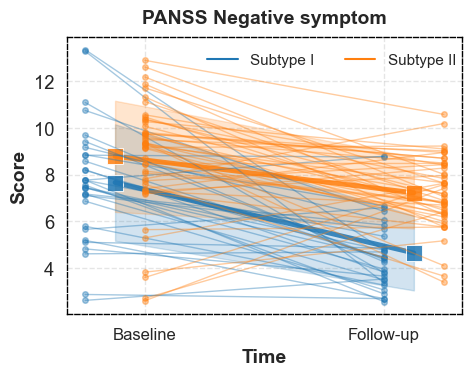

In [3]:
def plot_interaction(df_long, var_name):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # 设置整体风格，确保图表清晰且专业，增强图表对比度
    sns.set(style="whitegrid", font_scale=1.2)
    plt.figure(figsize=(5, 4))  # 提高分辨率以满足高水平出版要求
    
    # 将群组标签映射到新的名称
    df_long['Cluster'] = df_long['Cluster'].map({0: 'Subtype I', 1: 'Subtype II'})
    
    # 使用具有色盲友好特性的调色板
    palette = {"Subtype I": "#1f77b4", "Subtype II": "#ff7f0e"}
    
    # 绘制带误差条的交互作用图，并调整透明度以突出关键趋势线
    sns.lineplot(x="Time", y="Score", hue="Cluster", 
                 data=df_long, markers=True, dashes=False, 
                 ci='sd', palette=palette, 
                 marker='s', linewidth=3.5, alpha=0.85, markersize=12)
    
    # 为每个亚组设置不同的颜色，并在X轴上错开显示
    offset = {'Subtype I': -0.1, 'Subtype II': 0.1}  # 设置X轴偏移量
    for cluster, color in zip(['Subtype I', 'Subtype II'], ["#1f77b4", "#ff7f0e"]):
        grp = df_long[df_long['Cluster'] == cluster]
        for _, subject_grp in grp.groupby('Subject'):
            x_positions = subject_grp['Time'] + offset[cluster]  # 添加偏移量
            plt.plot(x_positions, subject_grp['Score'], marker='o', color=color, alpha=0.4, linewidth=1.0, markersize=4)

    # 图表标题和标签，使用更加清晰的字体大小和粗细
    plt.title(f'PANSS Negative symptom', fontsize=14, fontweight='bold', pad=10)
    plt.xlabel('Time', fontsize=14, fontweight='bold')
    plt.ylabel('Score', fontsize=14, fontweight='bold')
    plt.xticks([0.1, 0.9], ['Baseline', 'Follow-up'], fontsize=12)
    
    # 调整图例的位置和标签，设置图例框架和位置
    plt.legend(loc='upper left', fontsize=11, frameon=False, ncol=2, bbox_to_anchor=(0.32, 0.99))
    # 设置外边框线条黑色加粗
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
        spine.set_linestyle('--')
    # 设置网格线，提升图表的专业感，适度降低透明度
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()  # 自动调整布局，确保图表元素不重叠
    plt.savefig(f'image/{var_name}.jpg', dpi=1200, bbox_inches='tight')
    plt.show()

# 调用示例：绘制指定变量的交互作用图
var_name = 'Negative_symptom_at_baseline'
plot_interaction(results[var_name]['df_long'], var_name)

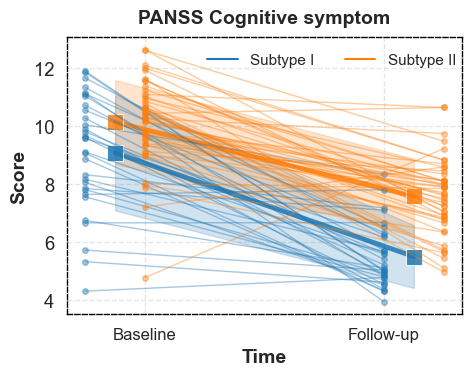

In [4]:
def plot_interaction(df_long, var_name):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # 设置整体风格，确保图表清晰且专业，增强图表对比度
    sns.set(style="whitegrid", font_scale=1.2)
    plt.figure(figsize=(5, 4))  # 提高分辨率以满足高水平出版要求
    
    # 将群组标签映射到新的名称
    df_long['Cluster'] = df_long['Cluster'].map({0: 'Subtype I', 1: 'Subtype II'})
    
    # 使用具有色盲友好特性的调色板
    palette = {"Subtype I": "#1f77b4", "Subtype II": "#ff7f0e"}
    
    # 绘制带误差条的交互作用图，并调整透明度以突出关键趋势线
    sns.lineplot(x="Time", y="Score", hue="Cluster", 
                 data=df_long, markers=True, dashes=False, 
                 ci='sd', palette=palette, 
                 marker='s', linewidth=3.5, alpha=0.85, markersize=12)
    
    # 为每个亚组设置不同的颜色，并在X轴上错开显示
    offset = {'Subtype I': -0.1, 'Subtype II': 0.1}  # 设置X轴偏移量
    for cluster, color in zip(['Subtype I', 'Subtype II'], ["#1f77b4", "#ff7f0e"]):
        grp = df_long[df_long['Cluster'] == cluster]
        for _, subject_grp in grp.groupby('Subject'):
            x_positions = subject_grp['Time'] + offset[cluster]  # 添加偏移量
            plt.plot(x_positions, subject_grp['Score'], marker='o', color=color, alpha=0.4, linewidth=1.0, markersize=4)

    # 图表标题和标签，使用更加清晰的字体大小和粗细
    plt.title(f'PANSS Cognitive symptom', fontsize=14, fontweight='bold',pad= 10)

    plt.xlabel('Time', fontsize=14, fontweight='bold')
    plt.ylabel('Score', fontsize=14, fontweight='bold')
    plt.xticks([0.1, 0.9], ['Baseline', 'Follow-up'], fontsize=12)
    
    # 调整图例的位置和标签，设置图例框架和位置
    plt.legend(loc='upper left', fontsize=11, frameon=False, ncol=2, bbox_to_anchor=(0.32, 0.99))
    # 设置外边框线条黑色加粗
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
        spine.set_linestyle('--')
        
    # 设置网格线，提升图表的专业感，适度降低透明度
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()  # 自动调整布局，确保图表元素不重叠
    plt.savefig(f'image/{var_name}.jpg', dpi=1200, bbox_inches='tight')
    plt.show()

# 调用示例：绘制指定变量的交互作用图
var_name = 'Cognitive_impairment_at_baseline'
plot_interaction(results[var_name]['df_long'], var_name)

In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings

warnings.filterwarnings('ignore')

# 读取数据
data = pd.read_excel('./rawdata.xlsx', sheet_name='Sheet1')
# 删除 'Cluster' 列中等于 3 的行
data = data[data['Cluster'] != 3]

# 将列名中的空格替换为下划线,去掉逗号
data.columns = [col.replace(' ', '_').replace(',', '') for col in data.columns]

# 定义要检测的变量
variables = [
    ("Negative_symptom_at_baseline", "Negative_symptom_at_follow-up"),
    ("Positive_symptom_at_baseline", "Positive_symptom_at_follow-up"),
    ("Affective_symptom_at_baseline", "Affective_symptom_at_follow-up"), 
    ("Cognitive_impairment_at_baseline", "Cognitive_impairment_at_follow-up")
]

# 确保所有列名一致
required_columns = [
    'Cluster', 'Age', 
    'Education_years','Gender'
]

missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing from the data: {missing_columns}")

# 创建字典以存储结果
results = {}

# 对每个变量进行单因素协方差分析
def perform_ancova_analysis(symptom_var, time_point):
    # 选择特定时间点的数据
    if time_point == "baseline":
        df = data[[symptom_var] + required_columns]
    else:
        df = data[[symptom_var.replace("baseline", "follow-up")] + required_columns]
        df.columns = [col.replace("follow-up", "baseline") for col in df.columns]
    
    # 构建ANCOVA模型公式
    formula = (f"{symptom_var} ~ Cluster + Age + "
               "Education_years + " +
               " + ".join([col for col in required_columns if col != 'Cluster']))
    
    # 拟合模型
    model = ols(formula, data=df).fit()
    
    # 进行方差分析
    ancova_results = anova_lm(model, typ=2)
    
    # 对p值进行FDR BH校正
    p_values = ancova_results['PR(>F)'].values
    p_values_corrected = multipletests(p_values, method='fdr_bh')[1]
    ancova_results['PR(>F)_corrected'] = p_values_corrected
    
    # 返回结果
    return {
        'ANCOVA_summary': ancova_results,
        'Model_summary': model.summary()
    }

# 对每个变量在基线和随访时进行分析并存储结果
for baseline_var, followup_var in variables:
    # 基线分析
    results[baseline_var] = perform_ancova_analysis(baseline_var, "baseline")
    # 随访分析
    results[followup_var] = perform_ancova_analysis(baseline_var, "follow-up")

# 输出结果
for var, result in results.items():
    print(f"Variable: {var}")
    print(result['ANCOVA_summary'])
    print(result['Model_summary'])
    print("---")

Variable: Negative_symptom_at_baseline
                     sum_sq    df         F    PR(>F)  PR(>F)_corrected
Cluster           13.196009   1.0  2.232567  0.139439               NaN
Age                3.264434   1.0  0.552294  0.459767               NaN
Education_years   11.958228   1.0  2.023153  0.159176               NaN
Gender             0.467677   1.0  0.079124  0.779284               NaN
Residual         431.480196  73.0       NaN       NaN               NaN
                                 OLS Regression Results                                 
Dep. Variable:     Negative_symptom_at_baseline   R-squared:                       0.088
Model:                                      OLS   Adj. R-squared:                  0.039
Method:                           Least Squares   F-statistic:                     1.771
Date:                          Fri, 21 Mar 2025   Prob (F-statistic):              0.144
Time:                                  18:58:43   Log-Likelihood:                -17

In [6]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multitest import multipletests
import warnings

warnings.filterwarnings('ignore')

# 读取数据
data = pd.read_excel('./rawdata.xlsx', sheet_name='Sheet1')

# 将列名中的空格替换为下划线,去掉逗号
data.columns = [col.replace(' ', '_').replace(',', '') for col in data.columns]

# 定义要检测的变量
variables = [
    ("Negative_symptom_at_baseline", "Negative_symptom_at_follow-up"),
    ("Positive_symptom_at_baseline", "Positive_symptom_at_follow-up"),
    ("Affective_symptom_at_baseline", "Affective_symptom_at_follow-up"), 
    ("Cognitive_impairment_at_baseline", "Cognitive_impairment_at_follow-up")
]

# 创建字典以存储结果
results = {}

# 定义函数进行配对t检验
def perform_paired_ttest(group, baseline_var, followup_var):
    baseline_scores = data[data['Cluster'] == group][baseline_var]
    followup_scores = data[data['Cluster'] == group][followup_var]
    
    # 进行配对t检验
    t_stat, p_value = stats.ttest_rel(baseline_scores, followup_scores)
    
    return p_value

# 对每个变量在两个亚组进行分析并存储结果
for baseline_var, followup_var in variables:
    p_values_group1 = perform_paired_ttest(0, baseline_var, followup_var)
    p_values_group2 = perform_paired_ttest(1, baseline_var, followup_var)
    
    # 将结果存储在字典中
    results[(baseline_var, 'Group1')] = p_values_group1
    results[(baseline_var, 'Group2')] = p_values_group2

# 将p值进行FDR BH校正
p_values = list(results.values())
p_values_corrected = multipletests(p_values, method='fdr_bh')[1]

# 更新结果字典
corrected_results = {}
for i, key in enumerate(results.keys()):
    corrected_results[key] = p_values_corrected[i]

# 输出结果
for var in variables:
    print(f"Variable: {var[0]}")
    print(f"Group 1 (Subtype I) p-value (corrected): {corrected_results[(var[0], 'Group1')]:.4f}")
    print(f"Group 2 (Subtype II) p-value (corrected): {corrected_results[(var[0], 'Group2')]:.4f}")
    print("---")

Variable: Negative_symptom_at_baseline
Group 1 (Subtype I) p-value (corrected): 0.0000
Group 2 (Subtype II) p-value (corrected): 0.0002
---
Variable: Positive_symptom_at_baseline
Group 1 (Subtype I) p-value (corrected): 0.0000
Group 2 (Subtype II) p-value (corrected): 0.0000
---
Variable: Affective_symptom_at_baseline
Group 1 (Subtype I) p-value (corrected): 0.0000
Group 2 (Subtype II) p-value (corrected): 0.0000
---
Variable: Cognitive_impairment_at_baseline
Group 1 (Subtype I) p-value (corrected): 0.0000
Group 2 (Subtype II) p-value (corrected): 0.0000
---
